In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_product = pd.read_csv('AI Recomendation Data Structure - Product Catalog - Product Catalog.csv')

In [3]:
df_product[df_product['product_description'].isna()].head()

,product_id,product_name,product_description
68,5db8055bacd1ca0001ff6f4f,Deviry 10mg Tablet 10'S,NaN
135,5df659d743d0000001ee2a06,Fixderma Kairfoll Capillar Lotion,NaN
159,5df670c543d0000001f0f003,Fixderma FCL Detan Mask - 100gm,NaN
180,5df8cbca5133bb0001bbb5a6,Acemed 100 Tablet 15'S,NaN
181,5df8cbca5133bb0001bbb5be,Aladin 120 Tablet 10'S,NaN


In [4]:
df_product[df_product['product_name'].str.contains('Acemed')]

,product_id,product_name,product_description
180,5df8cbca5133bb0001bbb5a6,Acemed 100 Tablet 15'S,NaN


In [5]:
df_sales = pd.read_csv('AI Recommendation Data Structure - Sales.csv',parse_dates=['purchased_date_time'])

In [6]:
df_sales.head()

,_id,customer_id,product_id,quantity,purchased_date_time
0,5e10363c1212410001255b2c,5e1024dd1212410001218ff2,5e0db9197bb5cb00011dbc91,1,2020-01-04 06:52:44.284000+00:00
1,5e1067a612124100012b3c80,5e103fea121241000126d997,5da59ebd23e99f0001240129,1,2020-01-04 10:23:34.472000+00:00
2,5e1093bc12124100012f5323,5c99cbe9d5e03b00015aadc4,5d91c2dc55544a0001fb6c2a,1,2020-01-04 13:31:40.855000+00:00
3,5e10a040a2d8c40001948cbc,5e0f668ed458ed00015187c6,5d91c2dc55544a0001fb6c2a,1,2020-01-04 14:25:04.279000+00:00
4,5e10a0e2a2d8c4000194c7d5,5c99cbe9d5e03b00015aadc4,5e0888af2d1d6b00010fc4d9,1,2020-01-04 14:27:46.929000+00:00


In [7]:
df_product = pd.read_csv('AI Recomendation Data Structure - Product Catalog - Product Catalog.csv')

In [8]:
df = pd.merge(df_product,df_sales,on='product_id',how='outer')

In [9]:
df_simple = df.drop(columns = ['product_description','_id','quantity','purchased_date_time','product_id'])

In [17]:
len(df[['customer_id','product_name']])

153444

In [25]:
df.head()

,product_id,product_name,product_description,_id,customer_id,quantity,purchased_date_time
0,5d91c2d455544a0001fb6b77,Mamaearth Milky Soft Baby Face Cream with Muru...,<ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...,5e1411d5db65b10001e83054,5e0f26a7cde91300013ef170,1.0,2020-01-07 05:06:29.742000+00:00
1,5d91c2d455544a0001fb6b77,Mamaearth Milky Soft Baby Face Cream with Muru...,<ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...,5e141406db65b10001e9b12f,5e1042bf121241000127359b,1.0,2020-01-07 05:15:50.833000+00:00
2,5d91c2d455544a0001fb6b77,Mamaearth Milky Soft Baby Face Cream with Muru...,<ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...,5e37e30c2c75d10001bd8ad7,5e1026ee1212410001222728,1.0,2020-02-03 09:08:28.684000+00:00
3,5d91c2d455544a0001fb6b77,Mamaearth Milky Soft Baby Face Cream with Muru...,<ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...,5e392607f26c880001f2f99d,5e2190b3592831000183153f,1.0,2020-02-04 08:06:31.588000+00:00
4,5d91c2d455544a0001fb6b77,Mamaearth Milky Soft Baby Face Cream with Muru...,<ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...,5e3fbf59c65625000128574c,5e3f9678c65625000124b0d9,1.0,2020-02-09 08:14:17.731000+00:00


In [27]:
df['product_name'].value_counts()

product_name
FISH OIL 1000mg OMEGA 3                                          1291
Acmist Moisturizing Cream Gel 50gm                               1163
UV Doux SPF 50 - 50gm 'Tube                                      1045
Ecosprin-75 Tablet 14'S                                           980
Medigra 50 Tablet 6'S                                             888
                                                                 ... 
Dr. Brown's Wide-Neck Silicone Handles, Turquoise (AC010-P2)        1
Sirona Intimate Wet Wipes - 20 Wipes (2 Pack - 10 Wipes Each)       1
Godrej Protekt Air & Surface Disinfectant Spray Aqua 240ml          1
Dr. Brown's Wide-Neck Silicone Handles, Pink (AC008-P2)             1
Borges Combo Extra Virgin Olive Oil                                 1
Name: count, Length: 13317, dtype: int64

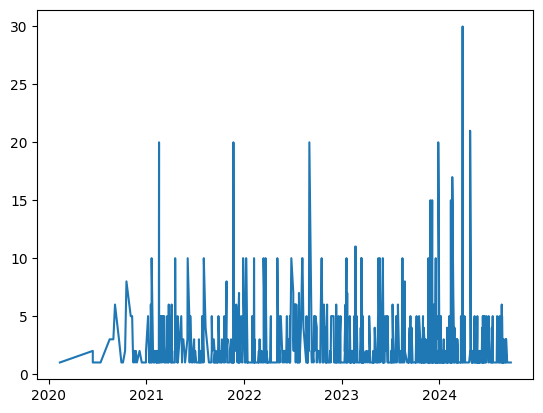

In [21]:
df_one_product = df[df['product_name']==r"Medigra 50 Tablet 6'S"]
plt.plot(df_one_product['purchased_date_time'],df_one_product['quantity'])

In [ ]:
df[df['customer_id']=='5e0f26a7cde91300013ef170']

In [35]:
len(df)

153444

In [9]:
df_filtered = df.groupby(['customer_id', 'product_name']).agg({'quantity': 'sum'}).reset_index()

In [10]:
df_filtered.head()

,customer_id,product_name,quantity
0,5c99cbe9d5e03b00015aadc4,1 Piece Double Layer Hot Bag,1.0
1,5c99cbe9d5e03b00015aadc4,Bioderma Photoderm AKN Mat SPF30 Mattifying Fl...,1.0
2,5c99cbe9d5e03b00015aadc4,Gift Voucher 100,250.0
3,5c99cbe9d5e03b00015aadc4,Insulin Humalog Mix 50 3ml,1.0
4,5c99cbe9d5e03b00015aadc4,Lumbar Corset With Strap,2.0


In [11]:
df_filtered = df_filtered.groupby('customer_id').filter(lambda x: x['product_name'].size >= 20)

In [12]:
len(df_filtered)

15733

In [13]:
df_filtered.groupby('customer_id')['product_name'].size().sort_values()

customer_id
62c5fff09c123cd6a161c79e     20
60167f77f8ac28000107718b     20
60f5014612189881b4771d1d     20
61fb9555652cbfe2b22f4dbd     20
5eb154f62219cf0001994bee     20
                           ... 
5e0f62f564de75000129d91a    184
5e10212c121241000120a71b    194
5e5d372d8c78530001a3641f    209
5e1026ee1212410001222728    219
5eba266fb99319000184b392    417
Name: product_name, Length: 404, dtype: int64

In [14]:
sales_cross_tab = pd.crosstab(df_filtered['customer_id'],df_filtered['product_name'])

In [15]:
from scipy.spatial.distance import pdist, squareform

In [16]:
# Calculate all pairwise distances
jaccard_distances = pdist(sales_cross_tab.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=sales_cross_tab.index, columns=sales_cross_tab.index)

In [60]:
sales_cross_tab

product_name,1 Piece Double Layer Hot Bag,100% Whey Gold Standard 1.47 lbs,100% Whey Gold Standard 2 lbs,120 Disques,2 Piece Double Layer Hot Bag,2 Piece Electrothermal Double Layer Hot Bag,3 in 1 Steamer,360 Block Sunscream Gel - 50gm,"3M Aura Disposable Respirator, FFP2, Unvalved, 9320+",60 KD Softgel Capsule 4'S,...,melapik ever,myolaxin cream,nox-100,pepsa-10,rab-20,revacon z shampoo,strepsil 8s,tazloc 40 15'S,thyronice 75,urocell syrup
customer_id,,,,,,,,,,,,,,,,,,,,,
5e0f26a7cde91300013ef170,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5e0f6013c1715600015b373e,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5e0f62f564de75000129d91a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5e1018a212124100011efdf1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5e101faa1212410001203309,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64dae16fd46df542a55f3271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64f4030ed230b9f23addb3b5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
65484da0197147f927a75b70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
jaccard_similarity_df.head()

customer_id,5e0f26a7cde91300013ef170,5e0f6013c1715600015b373e,5e0f62f564de75000129d91a,5e1018a212124100011efdf1,5e101faa1212410001203309,5e10212c121241000120a71b,5e10227a121241000120e52c,5e102612121241000121e0a8,5e102637121241000121e90e,5e1026ee1212410001222728,...,63d9390b2200190bb9c91385,64017731a358ab833eda7368,642326bb3d41d5489e357214,64522f146b1376be7219ac11,64953f67687a6ffd9c3ef360,64dae16fd46df542a55f3271,64f4030ed230b9f23addb3b5,65484da0197147f927a75b70,65c5f318321fbd2d7287737e,668992491c745dcc8d96bf83
customer_id,,,,,,,,,,,,,,,,,,,,,
5e0f26a7cde91300013ef170,1.000000,0.073298,0.059259,0.090909,0.075145,0.084249,0.083665,0.022059,0.088050,0.095563,...,0.0,0.008264,0.016393,0.007576,0.031250,0.020548,0.006944,0.0,0.007576,0.029240
5e0f6013c1715600015b373e,0.073298,1.000000,0.074906,0.069620,0.087209,0.083942,0.070588,0.029412,0.094340,0.073333,...,0.0,0.008197,0.008065,0.015152,0.055556,0.041667,0.042857,0.0,0.000000,0.041176
5e0f62f564de75000129d91a,0.059259,0.074906,1.000000,0.101322,0.050980,0.076923,0.102804,0.032710,0.058091,0.161383,...,0.0,0.009901,0.000000,0.009390,0.019048,0.017621,0.013393,0.0,0.004673,0.011765
5e1018a212124100011efdf1,0.090909,0.069620,0.101322,1.000000,0.094891,0.097046,0.087558,0.030000,0.122951,0.100386,...,0.0,0.011765,0.000000,0.010417,0.021277,0.027273,0.018692,0.0,0.000000,0.021898
5e101faa1212410001203309,0.075145,0.087209,0.050980,0.094891,1.000000,0.085938,0.109170,0.034188,0.115108,0.070671,...,0.0,0.000000,0.000000,0.000000,0.036364,0.048000,0.024194,0.0,0.000000,0.053333


In [61]:
target_customer = '5e0f26a7cde91300013ef170'

In [62]:
best_match = jaccard_similarity_df.loc[target_customer].sort_values(ascending=False).index[1]

In [63]:
len(set(df[df['customer_id']==target_customer]['product_name']))

102

In [64]:
len(set(df[df['customer_id']==best_match]['product_name']))

79

In [68]:
len(set(df[df['customer_id']==best_match]['product_name']) - set(df[df['customer_id']==target_customer]['product_name']))

62

In [67]:
set(df[df['customer_id']==best_match]['product_name']) - set(df[df['customer_id']==target_customer]['product_name'])

{'3 in 1 Steamer',
 "Azimed 500 Tablet 3'S",
 'BePositive Disposable Face Mask - 50 pcs',
 "Becozinc-G Capsule 10'S",
 'Boroline Big Cream 20gm',
 "Cefadrox 500mg Tablet 10'S",
 'Cetaphil Moisturising Cream - 250gm',
 'Cetaphil Oily Skin Cleanser-125ml',
 "Corbic Tablet 10'S",
 'Cotton Roll 4 Inch Pack',
 "D.F.O Gel 30gm 'Tube",
 "DV 60K Softgel Capsule 8'S",
 'Dabur Odomos Naturals Non-Sticky Mosquito Repellent Cream - 100g',
 "Delisprin 75 Tablet 10'S",
 "Delyte 10 Tablet 10'S",
 'Derma E Anti-Aging Regenerative Day Cream 56gm',
 'Derma E Anti-Aging Regenerative Night Cream 56gm',
 'Derma E Hydrating Gentle Cleanser 175ml',
 'Dettol 550ml Bottle',
 'Dettol Antiseptic Liquid 125ml',
 "Dettol Antiseptic Liquid 1ltr 'Bottle",
 'Dettol Antiseptic Liquid 250ml',
 'Dettol Antiseptic Liquid 60ml',
 'Dettol Disinfectant Spray 225ml/170gm',
 'Dettol Hand Sanitizer 50ml',
 'Dettol SkinCare Soap (4+1) OFFER PACK 75gm',
 'Dettol Soap (3+1) OFFER PACK 75gm',
 "Digene Tablet 15'S",
 'Disposable No

In [ ]:
df[df['customer_id']=='5e3d0461c656250001d2e0cd']